In [2]:
%load_ext rpy2.ipython

##LoF

In [101]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.Yes.dn.geneset.FMRP.lof.txt")


cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [102]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 285390      4
      V1 V2  V3       V4
1: 0.035  1 5.0 485.9960
2: 0.035  1 5.2 486.1258
3: 0.035  1 5.4 486.2428
4: 0.035  1 5.6 486.3486
5: 0.035  1 5.8 486.4445
6: 0.035  1 6.0 486.5317


In [103]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

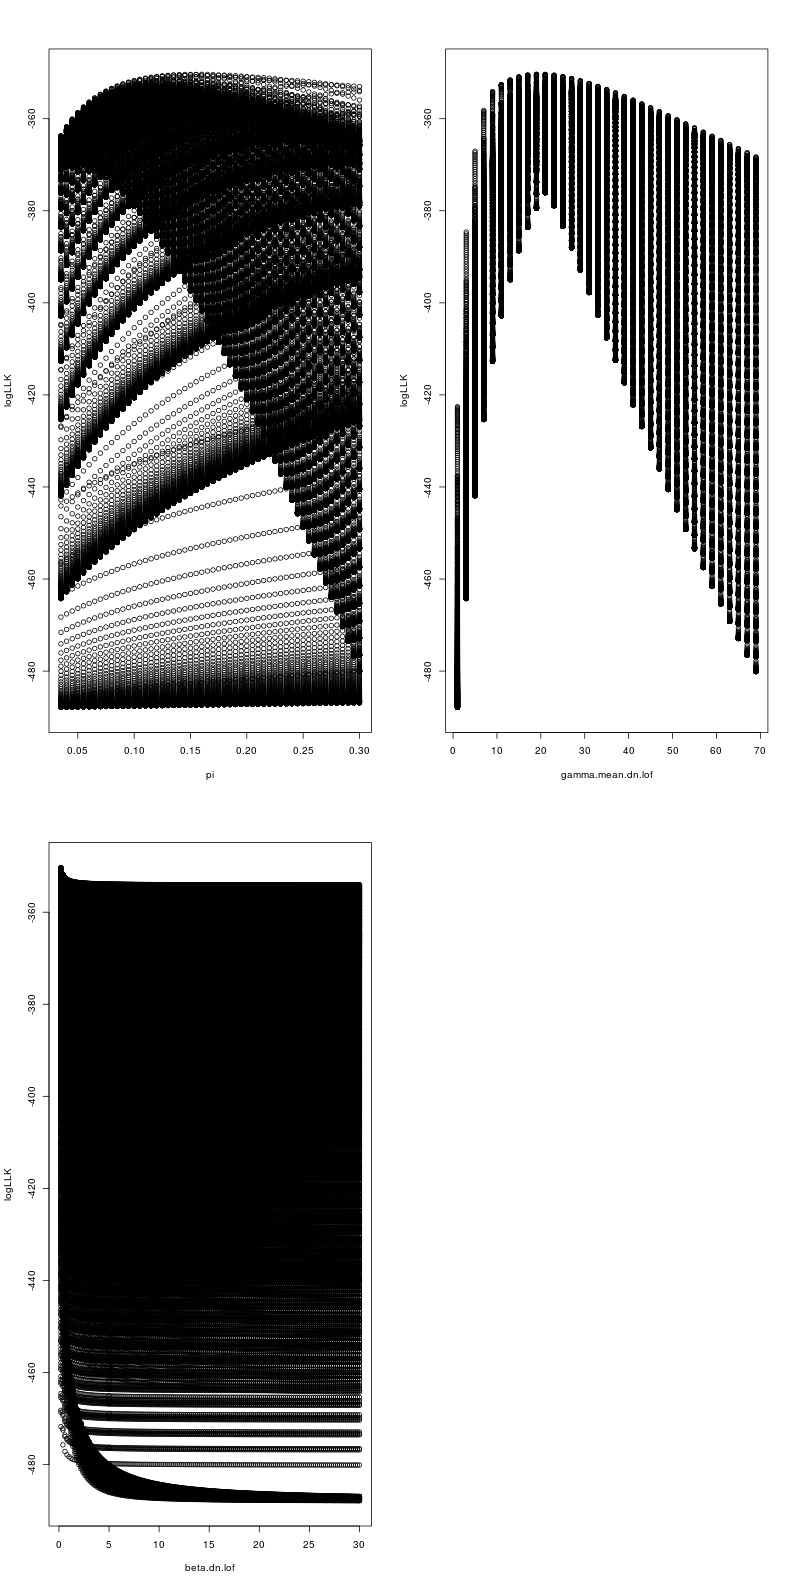

In [104]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.lof", "beta.dn.lof", "rho1.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

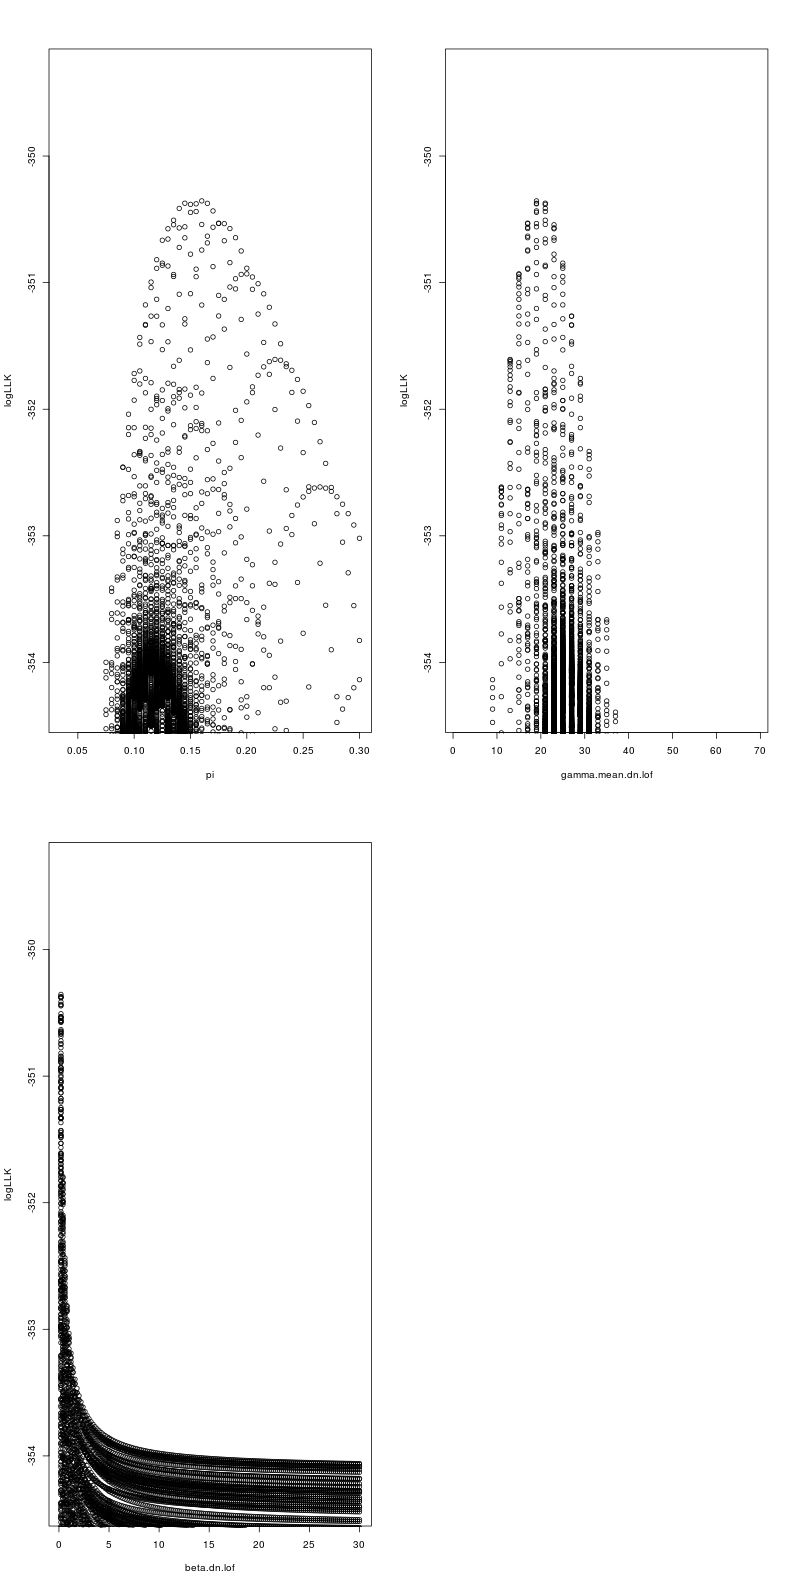

In [113]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 5
#d.cc.lof.1 <- d.cc.lof[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [106]:
%%R
d.cc.lof.1[order(V4)]

           V1 V2   V3       V4
     1: 0.160 19  0.2 350.3541
     2: 0.145 21  0.2 350.3725
     3: 0.165 19  0.2 350.3734
     4: 0.155 19  0.2 350.3772
     5: 0.150 21  0.2 350.3815
    ---                       
285386: 0.035  1 29.2 487.8315
285387: 0.035  1 29.4 487.8326
285388: 0.035  1 29.6 487.8338
285389: 0.035  1 29.8 487.8349
285390: 0.035  1 30.0 487.8360


###Set limit for the proportion of protective variants and the frequency of variants

In [107]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.0000017]

#d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

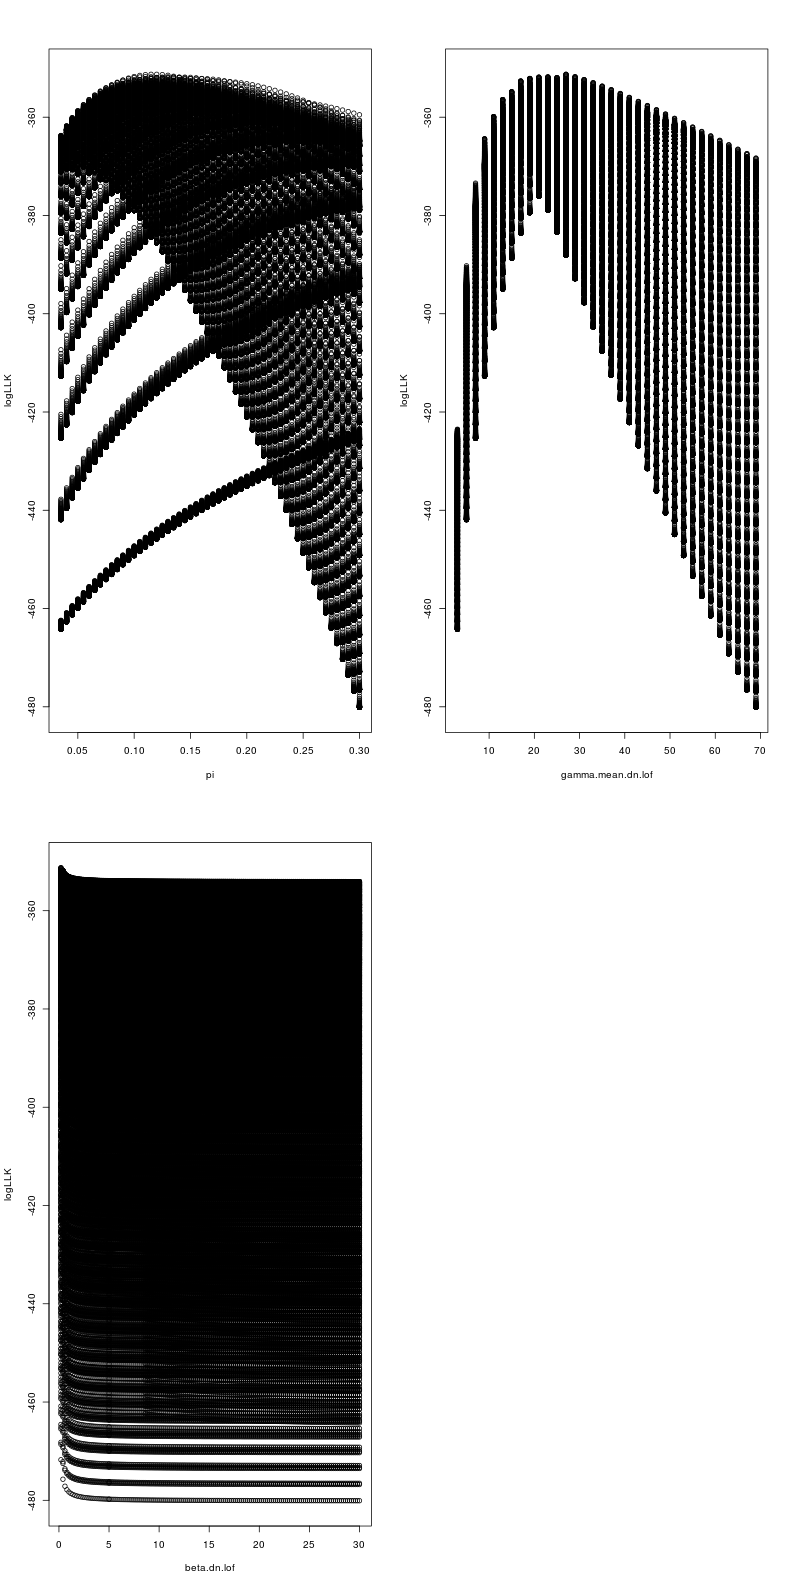

In [108]:
%%R -w 28 -h 56 -u cm

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

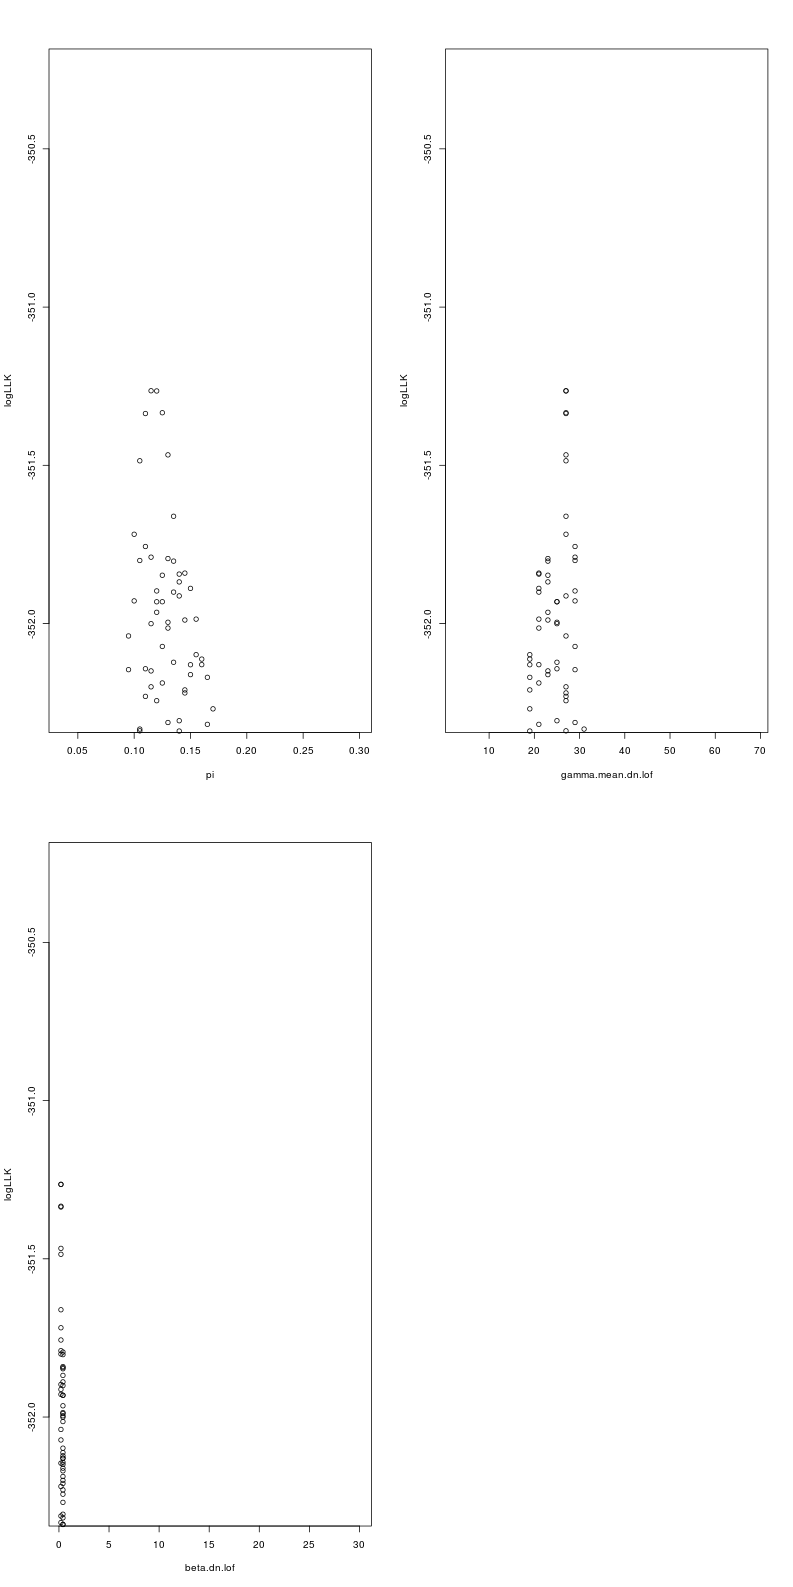

In [109]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 2
#d.cc.lof.1 <- d.cc.lof.1[V4>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [110]:
%%R
head(d.cc.lof.1[order(V4)], 40)


       V1 V2  V3       V4
 1: 0.115 27 0.2 351.2644
 2: 0.120 27 0.2 351.2650
 3: 0.125 27 0.2 351.3338
 4: 0.110 27 0.2 351.3363
 5: 0.130 27 0.2 351.4670
 6: 0.105 27 0.2 351.4856
 7: 0.135 27 0.2 351.6610
 8: 0.100 27 0.2 351.7178
 9: 0.110 29 0.2 351.7565
10: 0.115 29 0.2 351.7902
11: 0.130 23 0.4 351.7946
12: 0.105 29 0.2 351.8007
13: 0.135 23 0.4 351.8027
14: 0.145 21 0.4 351.8406
15: 0.140 21 0.4 351.8437
16: 0.125 23 0.4 351.8473
17: 0.140 23 0.4 351.8684
18: 0.150 21 0.4 351.8888
19: 0.120 29 0.2 351.8969
20: 0.135 21 0.4 351.9006
21: 0.140 27 0.2 351.9127
22: 0.100 29 0.2 351.9284
23: 0.125 25 0.4 351.9311
24: 0.120 25 0.4 351.9312
25: 0.120 23 0.4 351.9644
26: 0.155 21 0.4 351.9860
27: 0.145 23 0.4 351.9888
28: 0.130 25 0.4 351.9959
29: 0.115 25 0.4 352.0004
30: 0.130 21 0.4 352.0142
31: 0.095 27 0.2 352.0391
32: 0.125 29 0.2 352.0724
33: 0.155 19 0.4 352.0983
34: 0.160 19 0.4 352.1123
35: 0.135 25 0.4 352.1223
36: 0.160 21 0.4 352.1299
37: 0.150 19 0.4 352.1301
38: 0.110 25

In [111]:
#!gist -p Test_combined_geneset_dn_PRE.ipynb

In [112]:
!gist -u https://gist.github.com/1a9b1b3a0bba48a346b9 Test_combined_geneset_dn_PRE.ipynb

https://gist.github.com/1a9b1b3a0bba48a346b9


##MIS3

In [94]:
%%R
library("data.table")

d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.Yes.dn.geneset.FMRP.mis3.txt")



cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V4 != "NA"]

#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


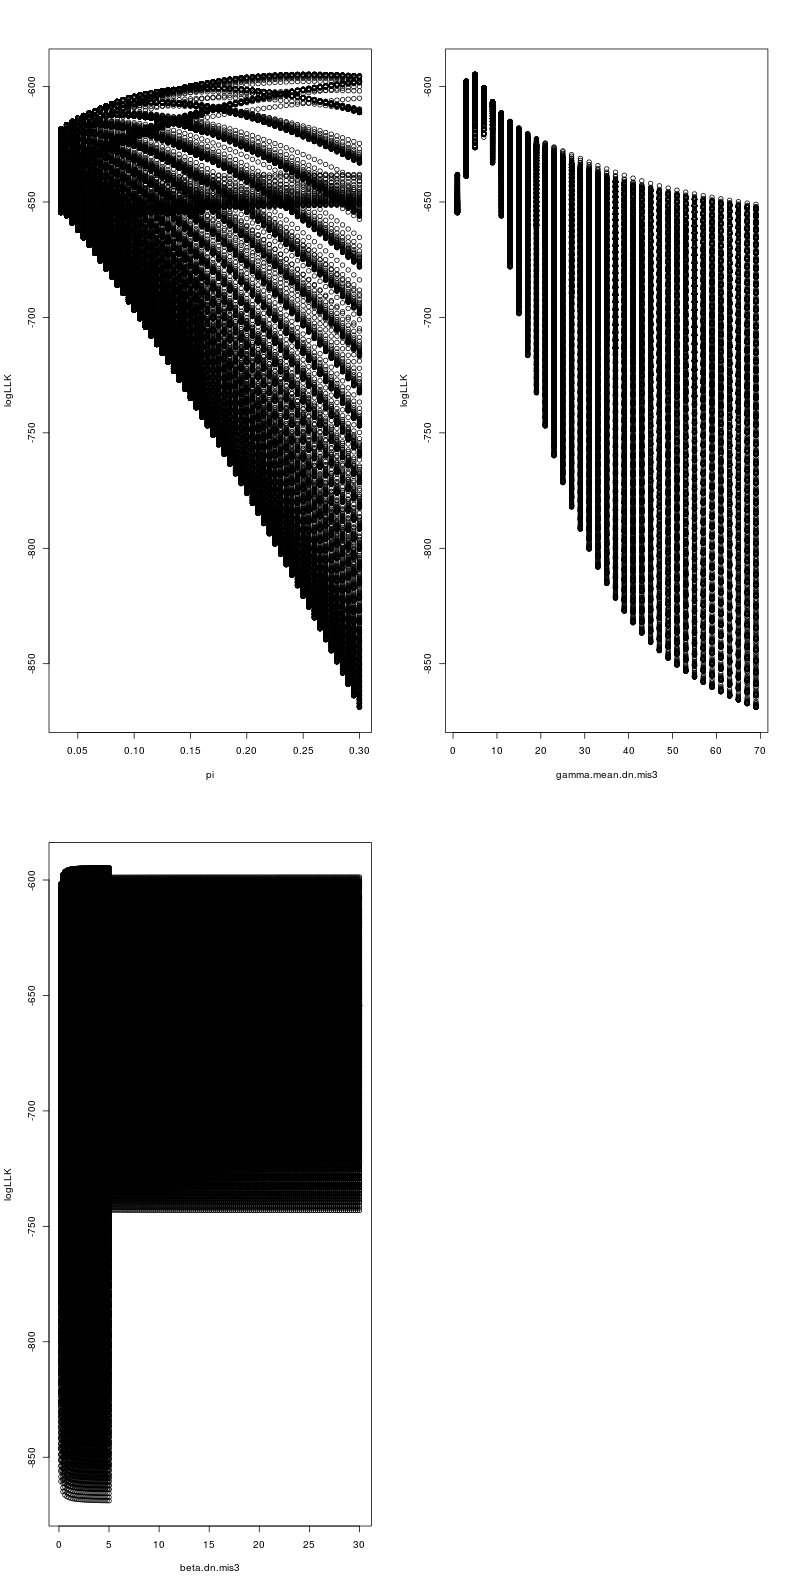

In [95]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.dn.mis3", "beta.dn.mis3")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK')
}

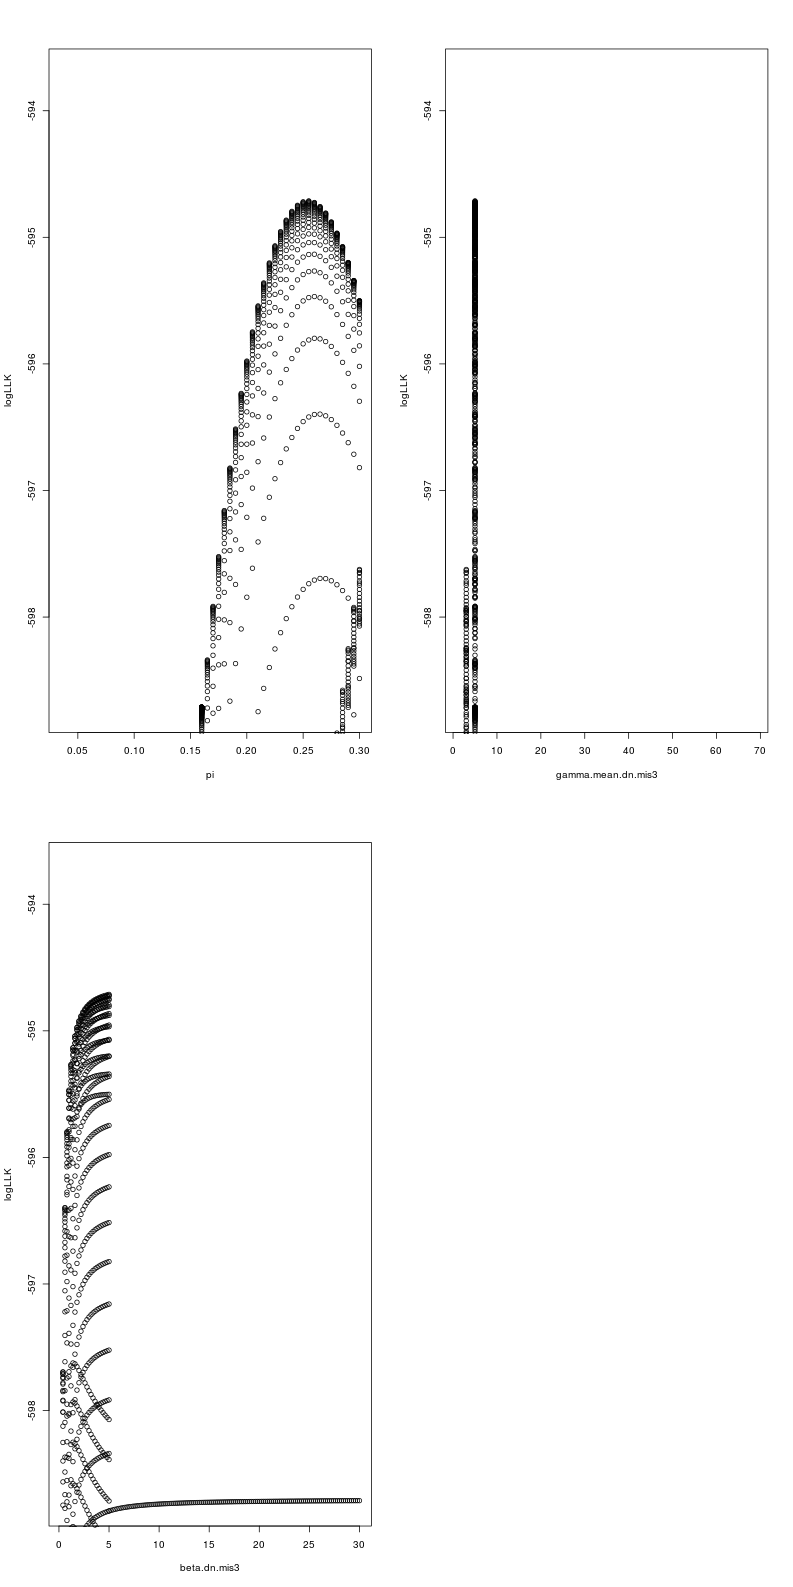

In [96]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

###Set limit

In [97]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.0002]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

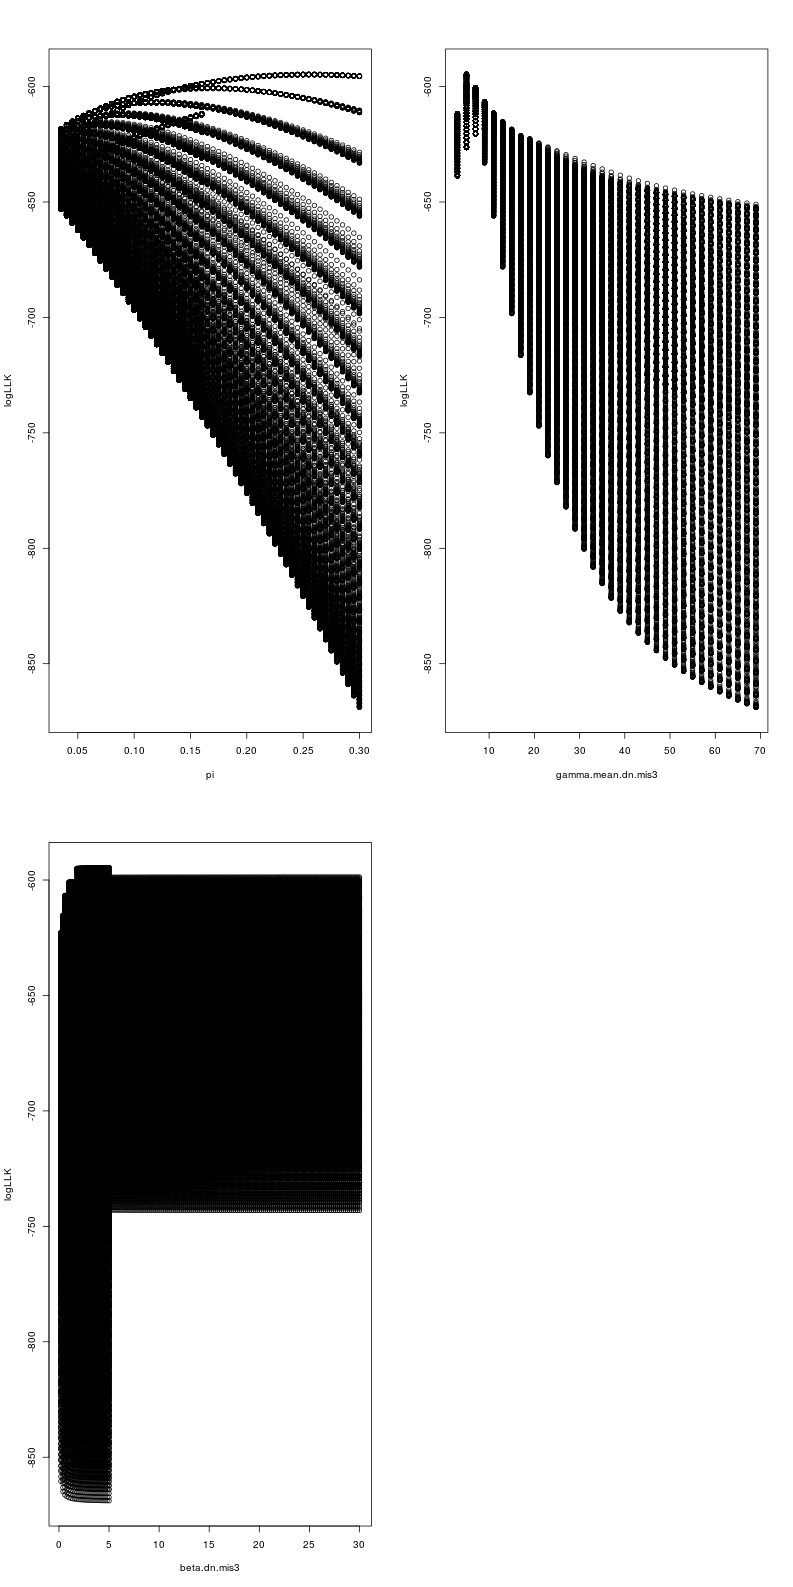

In [98]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

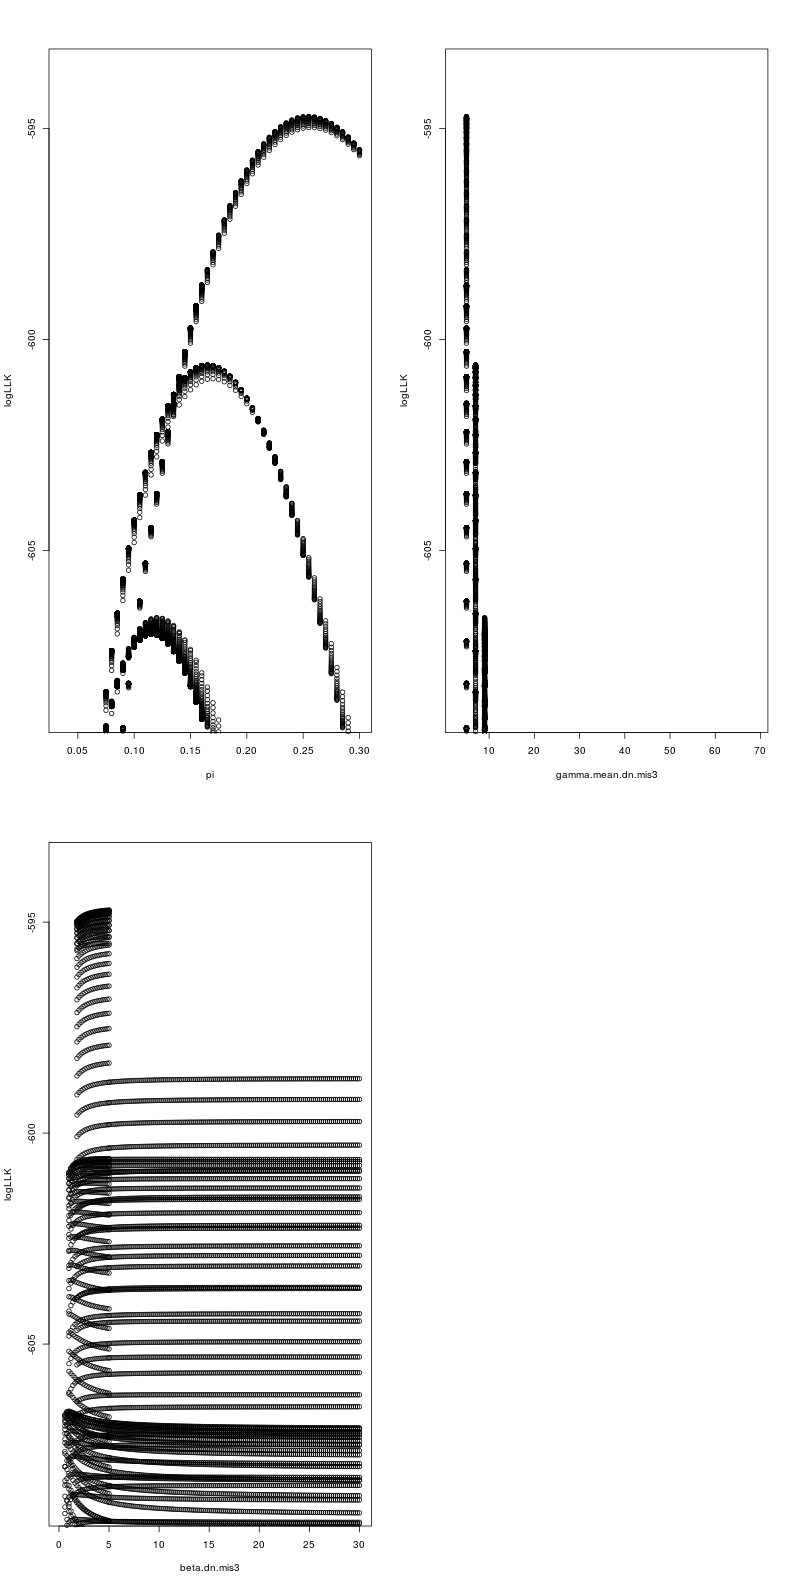

In [99]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 15

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [100]:
%%R
d.cc.mis3.1[V4<= -lLimit]

         V1 V2  V3       V4
   1: 0.075  7 5.0 608.3802
   2: 0.075  7 5.2 608.3782
   3: 0.075  7 5.4 608.3764
   4: 0.075  7 5.6 608.3748
   5: 0.075  7 5.8 608.3734
  ---                      
8037: 0.300  5 4.2 595.5062
8038: 0.300  5 4.4 595.5045
8039: 0.300  5 4.6 595.5031
8040: 0.300  5 4.8 595.5020
8041: 0.300  5 5.0 595.5012


###Use beta.dn = 1

In [81]:
%%R
d.cc.mis3.2 <- d.cc.mis3[(V3 <= 1.3) & (V3>=0.8)]

#d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

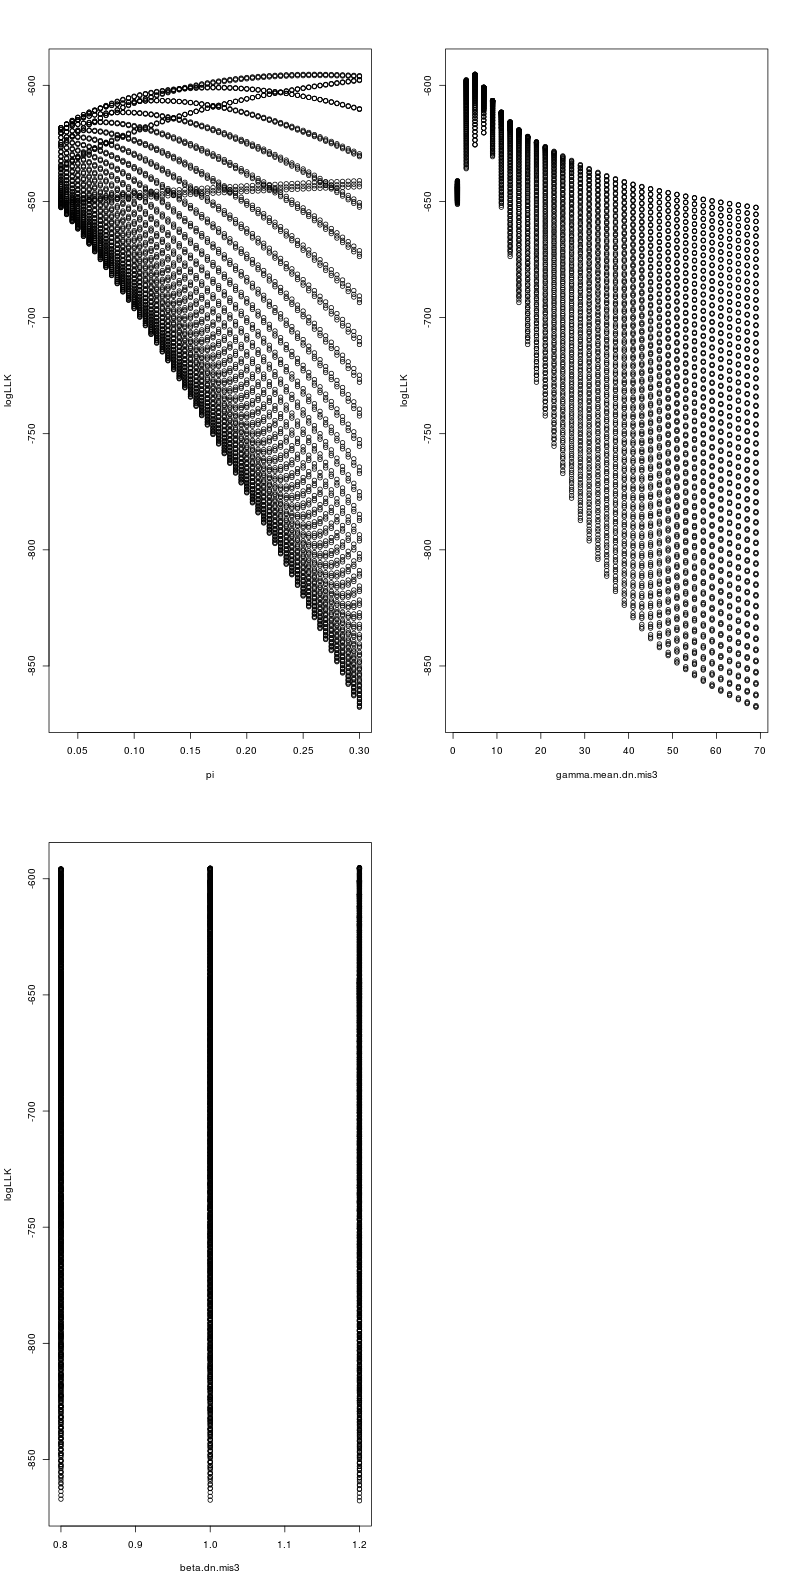

In [82]:
%%R -w 28 -h 56 -u cm


par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], -d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

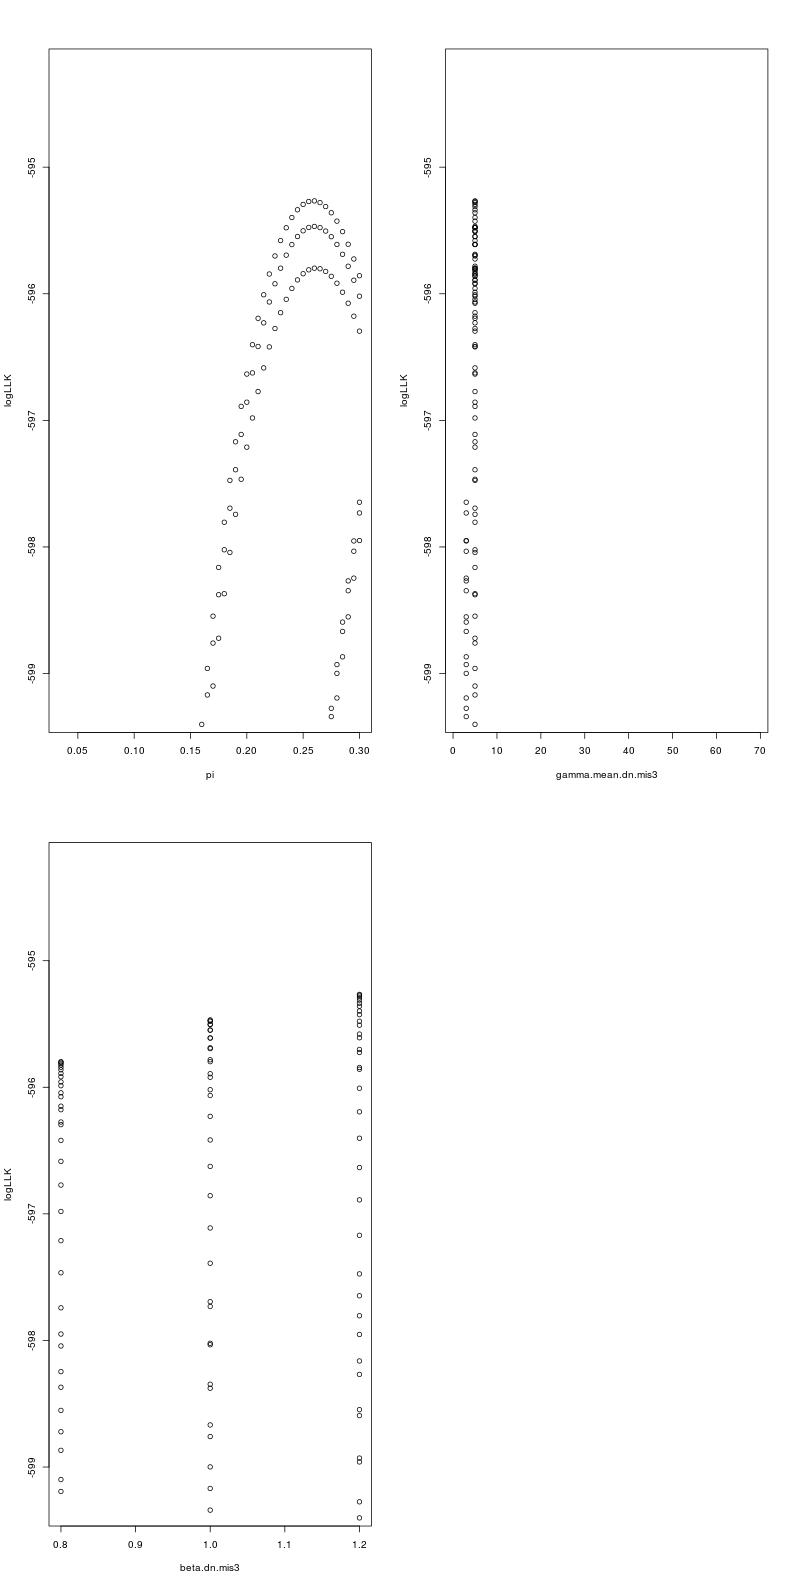

In [83]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3.2[[cLLK]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.2[[ii]], -d.cc.mis3.2[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}